___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016, 1,1 )

In [6]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [7]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.054218
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.681938
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.726604
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.674480
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.696808


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [12]:
bank_stocks = pd.concat([BAC, C,GS,JPM,MS,WFC], axis = 1, keys = tickers)

In [13]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.726604   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.674480   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.696808   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.859037   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.730473   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.868218   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.657003   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.454980   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.399338  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.424999  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.527611  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.566090  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.963749  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  29.116337  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.838438  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  29.179089  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.892221  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  28.515720  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.904305  
2006-01-04  31.530001  10870000.0  20.661839  
2006-01-05  31.495001  10158000.0  20.638908  
2006-01-06  31.680000   8403800.0  20.760138  
2006-01-09  31.674999   5619600.0  20.756863  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.785397  
2015-12-28  54.680000   8288800.0  46.665909  
2015-12-29  55.290001   7894900.0  47.186504  
2015-12-30  54.889999   8016900.0  46.845135  
2015-12-31  54.360001  10929800.0  46.392815  

[2517 rows

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

** Set the column name levels (this is filled out for you):**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [15]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.399338  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.424999  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.527611  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.566090  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.963749  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [29]:
# for t in tickers:
#     print(t, bank_stocks[t]['Close'].max())
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [31]:
returns = pd.DataFrame()

In [35]:
for tick in tickers:
    returns[tick + 'Return'] = n=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

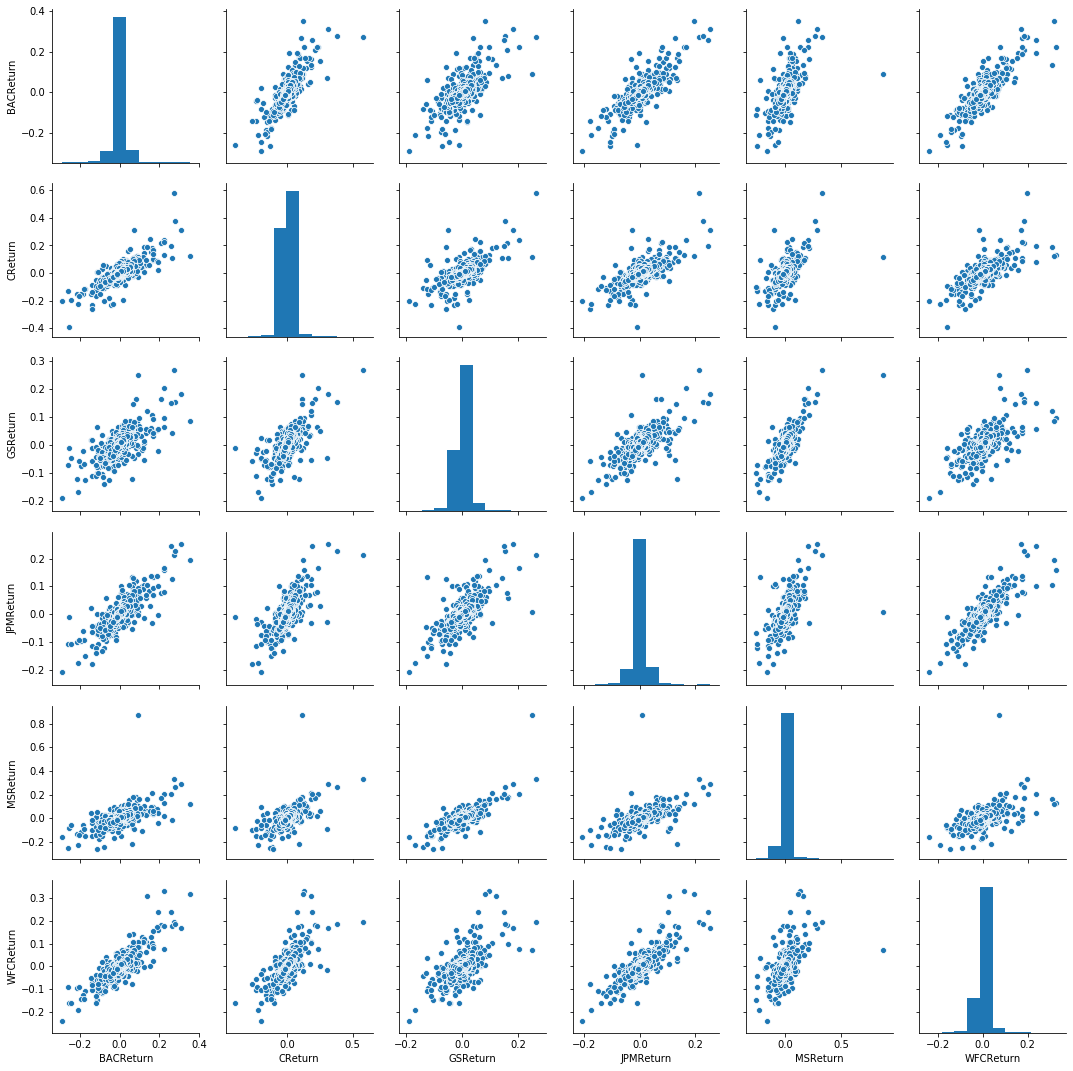

In [37]:
import seaborn as sns
sns.pairplot(returns[1:])

In [39]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

* See solution for details about Citigroup behavior....

In [41]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [43]:
returns['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



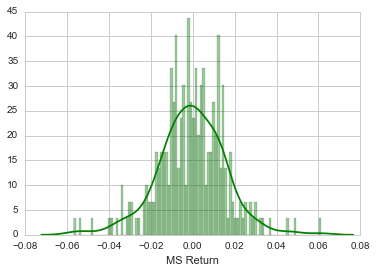

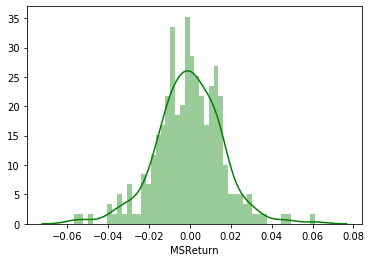

In [47]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MSReturn'], color = 'green', bins = 50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

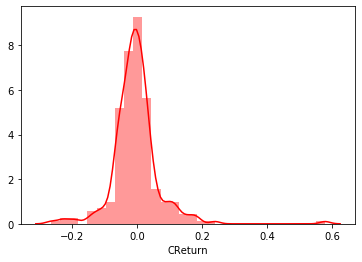

In [51]:
sns.distplot(returns['2008-01-01':'2008-12-31']['CReturn'], color = 'red', bins= 30)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



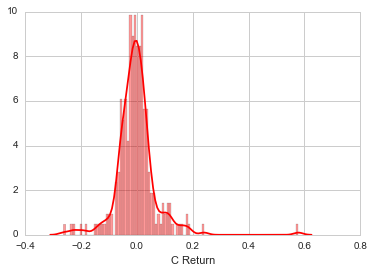

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

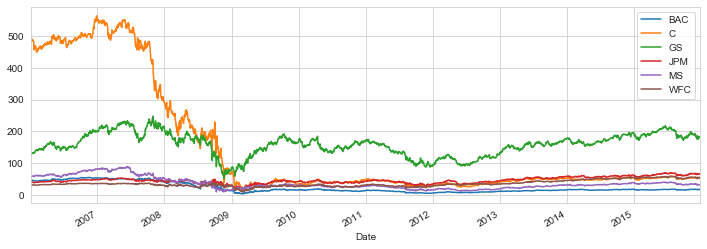

In [55]:
for t in tickers:
    bank_stocks[t]['Close'].plot(label = t, figsize=(12, 4))
plt.legend()

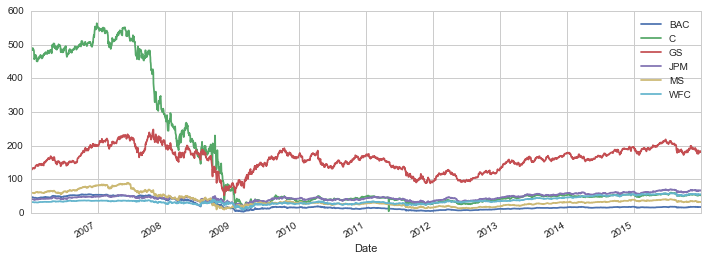

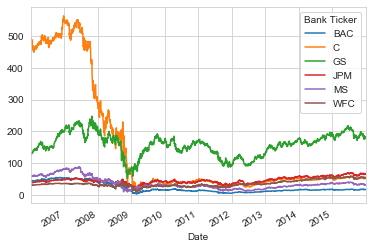

In [56]:
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').plot()

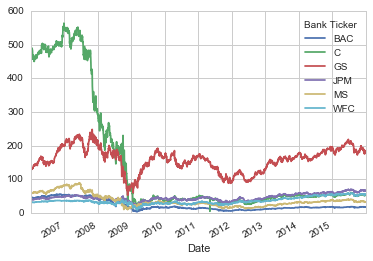

In [57]:
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

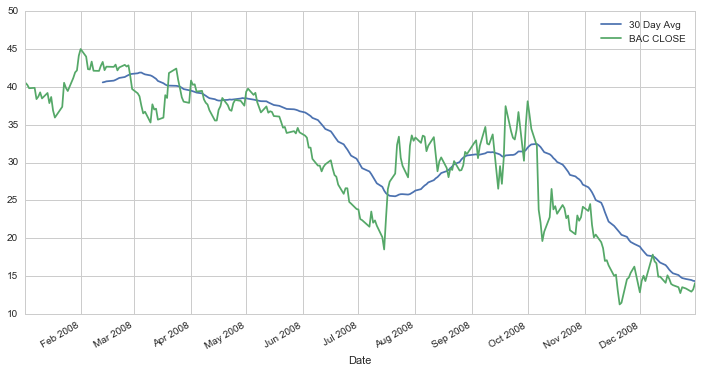

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



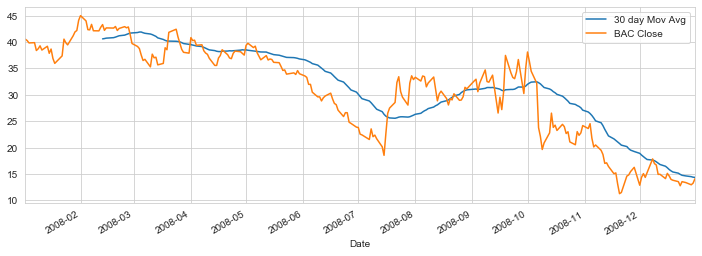

In [58]:
plt.figure(figsize=(12,4))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 day Mov Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

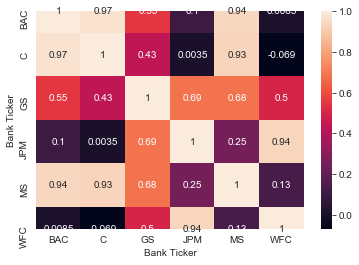

In [62]:
sns.heatmap(bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr(), annot =True)

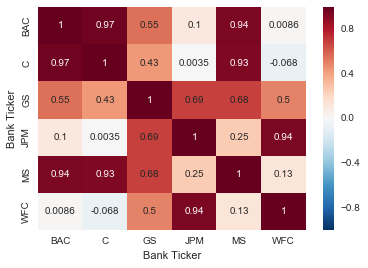

** Optional: Use seaborn's clustermap to cluster the correlations together:**

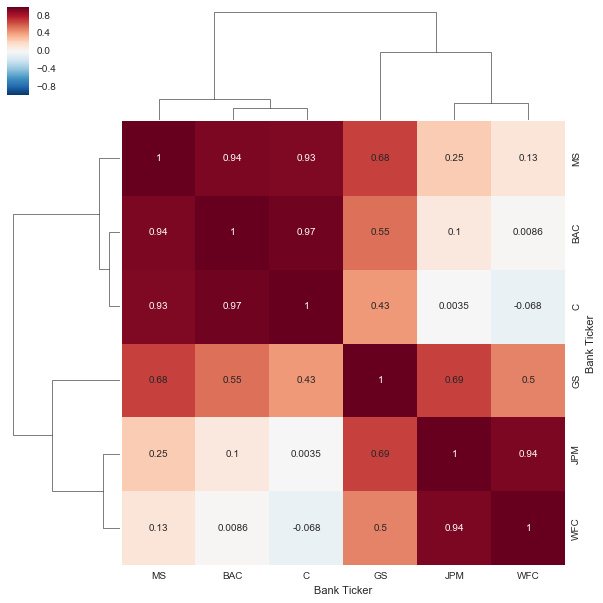

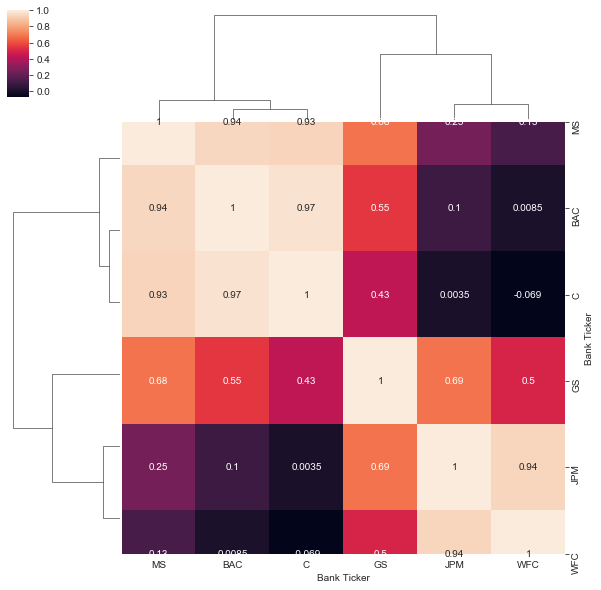

In [63]:
sns.clustermap(bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr(), annot =True)

In [64]:
cc = bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr()

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [65]:
cc.iplot(kind = 'heatmap', color='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [68]:
bac = BAC['2015-01-01':'2016-01-01']
bac.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [69]:
MS['Close'].ix['2015-01-01':'2016-12-31'].ta_plot(study='sma', periods=[13,21,55])
# bac.iplot(kind='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [70]:
BAC['Close'].ix['2015-01-01':'2016-12-31'].ta_plot(study='boll')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.